In [1]:
#导入需要使用的库
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import os
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.options.display.max_columns = None
pd.set_option('display.float_format', lambda x: '%.4f' % x) 
# pd.set_option('display.max_columns',50) #设置显示的最大列数，同时，也可以根据需要通过set_option函数设置其他的属性


## 载入数据

In [5]:
## 1) 载入训练集和测试集；
path = 'C:/Users/87495/Desktop/天池/新三板/'
Train_data = pd.read_csv(path+'控制样本.csv', sep=',')
Test_data = pd.read_csv(path+'违规样本.csv', sep=',')

In [ ]:
# 合并方便后面的操作
df = pd.concat([Train_data, Test_data], ignore_index=True)

In [6]:
## 2) 简略观察数据(head()+shape)
Train_data.head().append(Train_data.tail())

,证券代码,证券简称,挂牌时间,总资产,公司规模,总股本,净利润,Loss,产权性质,两职合一,股权集中度,赫芬达尔指数,总资产周转率,固定资产周转率,流动资产周转率,存货周转率,应收账款周转率,速动比率,产权比率,流动比率,已获利息倍数,销售毛利率,销售净利率,总资产净利率,净资产收益率,现金流动负债率,第1大股东持股比例,第2大股东持股比例,第3大股东持股比例,第4大股东持股比例,第5大股东持股比例,第6大股东持股比例,第7大股东持股比例,第8大股东持股比例,第9大股东持股比例,第10大股东持股比例,第1大股东持股数,第2大股东持股数,第3大股东持股数,第4大股东持股数,第5大股东持股数,第6大股东持股数,第7大股东持股数,第8大股东持股数,第9大股东持股数,第10大股东持股数,高管持股数,管理层持股比例,违规倾向,违规行为数量
0,400002.NQ,长白5,21.0000,287135079.5699,19.4755,60599286,56329011.37,0,0,0,1,0.2086,0.0031,0.3331,0.0062,0.0000,0.0000,68.4188,0.0069,68.4671,0.0000,0.6855,63.9328,0.1962,0.3005,8.7456,0.4554,0.0236,0.0207,0.0098,0.0092,0.0079,0.0075,0.0069,0.0058,0.0052,27599286,1427217,1252760,595800,557100,480000,451800,415998,349670,316100,0,0.0000,0,0
1,400005.NQ,海国实5,21.0000,36753747.8200,17.4198,451320320,'-5326206.119,1,1,0,0,0.0933,0.0168,0.0361,0.0324,0.0000,35.3498,9.0700,0.1395,9.0702,0.0000,0.9625,-8.6043,-0.1449,-0.1642,-2.2608,0.1817,0.1817,0.1637,0.0179,0.0127,0.0095,0.0061,0.0024,0.0024,0.0011,82005600,82005600,73880000,8100000,5750000,4300000,2775000,1100000,1075000,500000,0,0.0000,0,0
2,400008.NQ,水仙A5,21.0000,103400213.3900,18.4541,236401000,69178982.17,0,0,0,1,0.0652,0.2898,0.8190,0.4488,0.0000,23.5166,0.3955,43.6736,0.5523,0.0000,0.1698,2.3086,0.6690,0.0000,0.1204,0.2160,0.1347,0.0119,0.0112,0.0112,0.0093,0.0074,0.0065,0.0062,0.0060,51060020,31834000,2811309,2640000,2640000,2200000,1746800,1540000,1466700,1418099,0,0.0000,0,0
3,400010.NQ,鹫峰5,20.0000,24468258.6500,17.0129,135000000,'-3205219.542,1,1,0,1,0.1344,0.0000,0.0000,0.0000,0.0000,0.0000,0.0106,0.5831,0.0106,-2757.1350,0.0000,0.0000,-0.1310,-0.1862,-0.0041,0.3596,0.0596,0.0259,0.0242,0.0167,0.0000,0.0000,0.0000,0.0000,0.0000,48540828,8048000,3500000,3270000,2260000,0,0,0,0,0,48915268,0.3623,0,0
4,400012.NQ,国晟1,20.0000,584470968.3700,20.1862,398924769,'-24489333.57,1,1,0,0,0.1082,0.1069,0.5297,0.2064,1.5403,4.8503,2.4345,0.2478,2.8327,-2.9321,-0.0137,-0.3918,-0.0419,-0.0481,0.2351,0.3153,0.0580,0.0456,0.0435,0.0385,0.0365,0.0356,0.0312,0.0184,0.0155,125771498,23153266,18191853,17333778,15348177,14576798,14202892,12458221,7345020,6198967,0,0.0000,0,0
5939,873547.NQ,亿顺股份,2.0000,15880610.8400,16.5806,11400000,632302.4012,0,1,1,1,0.3658,0.8168,6.6201,1.6909,0.0000,10.9817,3.2880,0.2262,3.4321,0.0000,0.5053,0.0487,0.0398,0.0529,0.5022,0.5100,0.3058,0.0877,0.0614,0.0263,0.0088,0.0000,0.0000,0.0000,0.0000,5814000,3486120,999780,699960,299820,100320,0,0,0,0,9300120,0.8158,0,0
5940,873549.NQ,华联医疗,2.0000,429403306.1700,19.8779,40000000,171979459.3,0,1,1,1,0.4433,2.7865,19.9382,3.6178,13.8029,17.7092,1.5929,0.6651,2.0999,114.6361,0.3528,0.1437,0.4005,0.6601,1.0939,0.6424,0.0928,0.0928,0.0872,0.0761,0.0017,0.0017,0.0017,0.0017,0.0017,25694692,3711510,3711510,3489373,3045195,69544,69544,69544,69544,69544,33256800,0.8314,0,0
5941,873550.NQ,乡村绿洲,2.0000,123506498.9899,18.6318,10800000,5563597.26,0,1,1,1,0.4154,0.3030,0.4985,0.7921,0.6655,66.6166,0.0257,1.3310,0.6832,12.5778,0.2512,0.1487,0.0450,0.0965,0.4819,0.6000,0.1700,0.1200,0.1100,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6480000,1836000,1296000,1188000,0,0,0,0,0,0,9612000,0.8900,0,0
5942,873551.NQ,勤成健康,2.0000,13521902.0900,16.4198,6600000,1787338.54,0,1,0,1,0.4648,1.7067,27.9545,1.9780,1.3394,37.1536,0.7520,0.2941,3.8124,14.8979,0.5902,0.0774,0.1322,0.1839,0.4593,0.6100,0.3000,0.0300,0.0300,0.0300,0.0000,0.0000,0.0000,0.0000,0.0000,4026000,1980000,198000,198000,198000,0,0,0,0,0,594000,0.0900,0,0
5943,873556.NQ,聚宝盆,2.0000,77085720.7600,18.1604,29000000,3304125.249,0,1,0,1,0.6800,0.5567,2.8950,0.7491,3.7788,1.2898,1.3113,0.6138,1.8540,3.1407,0.2198,0.0770,0.0429,0.0754,-0.1549,0.8000,0.2000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,23200000,5800000,0,0,0,0,0,0,0,0,29000000,1.0000,0,0


In [7]:
Train_data.shape

(5944, 50)

In [8]:
Test_data.head().append(Train_data.tail())

,证券代码,证券简称,挂牌时间,总资产,公司规模,总股本,净利润,Loss,产权性质,两职合一,股权集中度,赫芬达尔指数,总资产周转率,固定资产周转率,流动资产周转率,存货周转率,应收账款周转率,速动比率,产权比率,流动比率,已获利息倍数,销售毛利率,销售净利率,总资产净利率,净资产收益率,现金流动负债率,第1大股东持股比例,第2大股东持股比例,第3大股东持股比例,第4大股东持股比例,第5大股东持股比例,第6大股东持股比例,第7大股东持股比例,第8大股东持股比例,第9大股东持股比例,第10大股东持股比例,第1大股东持股数,第2大股东持股数,第3大股东持股数,第4大股东持股数,第5大股东持股数,第6大股东持股数,第7大股东持股数,第8大股东持股数,第9大股东持股数,第10大股东持股数,高管持股数,管理层持股比例,违规倾向,违规行为数量
0,430034.NQ,大地股份,14.0000,921356444.1200,20.6414,50000000,91498065.75,0,1,1,0,0.1119,1.5989,8.2832,3.3320,6.0711,21.0241,0.7289,1.9089,1.4483,35.6194,0.2231,0.0621,0.0993,0.1706,0.2743,0.2604,0.1588,0.1028,0.0663,0.0623,0.0609,0.0345,0.0259,0.0230,0.0216,13022494,7940000,5140354,3313354,3115644,3043645,1725000,1294026,1148000,1078026,27005873,0.5401,1,1
1,430052.NQ,灿和兄弟,13.0000,255585194.6300,19.3591,17764307,12230007.15,0,1,0,0,0.2078,1.8159,82.0687,1.9827,0.0000,64.0914,4.0073,0.2864,4.1081,0.0000,0.5210,0.0264,0.0479,0.0218,0.7318,0.3299,0.2814,0.1126,0.0627,0.0563,0.0402,0.0281,0.0180,0.0158,0.0120,5861000,4999500,2000000,1114213,1000000,713600,500000,320000,280000,213500,5861000,0.3299,1,1
2,430052.NQ,灿和兄弟,13.0000,344258969.3299,19.6569,17764307,31504171.06,0,1,1,0,0.2075,0.6801,144.2948,0.9266,0.0000,3.1354,3.1275,0.3664,3.5044,0.0000,0.7259,0.1346,0.0915,0.0787,0.1423,0.3299,0.2814,0.1126,0.0599,0.0563,0.0402,0.0281,0.0180,0.0158,0.0120,5861000,4999500,2000000,1064213,1000000,713600,500000,320000,280000,213500,5861000,0.3299,1,1
3,430056.NQ,中航新材,13.0000,423880389.1100,19.8650,79950000,16136278.65,0,0,0,1,0.4177,0.3523,2.5774,0.5338,0.8981,1.3631,1.0235,1.2605,1.6396,4.8534,0.4171,0.1081,0.0381,0.0865,0.1450,0.6011,0.2336,0.0412,0.0082,0.0079,0.0075,0.0061,0.0060,0.0060,0.0054,48060000,18676800,3300000,659500,628949,599950,489951,480713,479249,438750,2913612,0.0364,1,1
4,430058.NQ,意诚信通,13.0000,139851706.6999,18.7561,35038514,4014303.389,0,1,1,1,0.9071,0.9472,4.9318,1.6669,4.3658,5.3561,1.2892,0.5541,1.8851,6.7007,0.2346,0.0303,0.0287,0.0423,0.2240,0.9522,0.0178,0.0060,0.0043,0.0043,0.0043,0.0014,0.0014,0.0014,0.0014,33363514,625000,210000,150000,150000,150000,50000,50000,50000,50000,34698514,0.9903,1,1
5939,873547.NQ,亿顺股份,2.0000,15880610.8400,16.5806,11400000,632302.4012,0,1,1,1,0.3658,0.8168,6.6201,1.6909,0.0000,10.9817,3.2880,0.2262,3.4321,0.0000,0.5053,0.0487,0.0398,0.0529,0.5022,0.5100,0.3058,0.0877,0.0614,0.0263,0.0088,0.0000,0.0000,0.0000,0.0000,5814000,3486120,999780,699960,299820,100320,0,0,0,0,9300120,0.8158,0,0
5940,873549.NQ,华联医疗,2.0000,429403306.1700,19.8779,40000000,171979459.3,0,1,1,1,0.4433,2.7865,19.9382,3.6178,13.8029,17.7092,1.5929,0.6651,2.0999,114.6361,0.3528,0.1437,0.4005,0.6601,1.0939,0.6424,0.0928,0.0928,0.0872,0.0761,0.0017,0.0017,0.0017,0.0017,0.0017,25694692,3711510,3711510,3489373,3045195,69544,69544,69544,69544,69544,33256800,0.8314,0,0
5941,873550.NQ,乡村绿洲,2.0000,123506498.9899,18.6318,10800000,5563597.26,0,1,1,1,0.4154,0.3030,0.4985,0.7921,0.6655,66.6166,0.0257,1.3310,0.6832,12.5778,0.2512,0.1487,0.0450,0.0965,0.4819,0.6000,0.1700,0.1200,0.1100,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6480000,1836000,1296000,1188000,0,0,0,0,0,0,9612000,0.8900,0,0
5942,873551.NQ,勤成健康,2.0000,13521902.0900,16.4198,6600000,1787338.54,0,1,0,1,0.4648,1.7067,27.9545,1.9780,1.3394,37.1536,0.7520,0.2941,3.8124,14.8979,0.5902,0.0774,0.1322,0.1839,0.4593,0.6100,0.3000,0.0300,0.0300,0.0300,0.0000,0.0000,0.0000,0.0000,0.0000,4026000,1980000,198000,198000,198000,0,0,0,0,0,594000,0.0900,0,0
5943,873556.NQ,聚宝盆,2.0000,77085720.7600,18.1604,29000000,3304125.249,0,1,0,1,0.6800,0.5567,2.8950,0.7491,3.7788,1.2898,1.3113,0.6138,1.8540,3.1407,0.2198,0.0770,0.0429,0.0754,-0.1549,0.8000,0.2000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,23200000,5800000,0,0,0,0,0,0,0,0,29000000,1.0000,0,0


In [9]:
Test_data.shape

(1246, 50)

## 总览数据情况

In [ ]:
#describe种有每列的统计量，个数count、平均值mean、方差std、最小值min、中位数25% 50% 75% 、以及最大值
#看这个信息主要是瞬间掌握数据的大概的范围以及每个值的异常值的判断，
#比如有的时候会发现999 9999 -1 等值这些其实都是nan的另外一种表达方式，有的时候需要注意下
#info 通过info来了解数据每列的type，有助于了解是否存在除了nan以外的特殊符号异常

In [ ]:
## 1) 通过describe()来熟悉数据的相关统计量
Train_data.describe()

In [ ]:
## 2) 通过info()来熟悉数据类型
Train_data.info()

## 转化数据类型

In [ ]:
#astype
df.astype(int) 
##只能转化全部为数字组成的数据

#to_numeric
##pandas.to_numeric(arg, errors='raise', downcast=None)  
###默认返回dtype为float64或int64
###errors:{'ignore'，'raise'，'coerce'}，
# 默认为'raise'
# 如果为'raise',则无效的解析将引发异常;
# 如果为'coerce',则将无效解析设置为NaN;
# 如果为'ignore',则无效的解析将返回输入;
pd.to_numeric(df,errors='coerce')
##将字符串类型的数据转化为浮点型，并将原数据中由字母组成的字符串强制转化为NaN，但它是一个浮点数

## 构造函数去除字符串中非数字的字符 

In [ ]:
def convert_money(value):
    new_value=value.replace("$","").replace(",","")
    return float(new_value)
df.apply(convert_money)
#非数字字符替换为空不是空格
convert_money1=lambda x: float(x.replace("%",""))
df.apply(convert_money1)
#lanbda函数（匿名函数）效果同上

## 将评价字段转换为数值

In [ ]:
def convert_pj(value):
    if "万" in value:
        new_value=float(value.replace("万",""))*10000
    else:
        new_value=value.replace("+","")
    return float(new_value)
data['评价']=data['评价'].astype(str).apply(convert_pj)
data['评价']

## 数据的一致性检查

In [ ]:
strlist=[]
for i in data['movie_name'].index:
    if isinstance(data['movie_name'][i],str)==False:
        strlist.append(i)
data['movie_name'][strlist]

## 处理重复值

In [ ]:
#检查重复值
df.duplicated(subset=[],keep='False')
#subset：指明数据子集，即某个特征或几个特征
# keep: 删除重复项并保留第一次出现的。取值可以为first last False
#first:保留第一个 last:保留最后一个 False:所有重复数据都标记为True
df.duplicated().any()#返回True，说明df有重复记录

In [ ]:
#删除重复值
df.drop_duplicates(keep='last',inplace=False)
#inplace=False生成一个删除了重复数据之后的新数据集，True会修改当前数据集

## 重复率

In [ ]:
data[data.duplicated()].count()/data.count()

## 处理缺失值

In [ ]:
#查看每列的存在nan情况
df.isnull().sum()

In [ ]:
# nan可视化
missing = Train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
#通过以上两句可以很直观的了解哪些列存在 “nan”, 并可以把nan的个数打印，主要的目的在于 nan存在的个数是否真的很大，
#如果很小一般选择填充，如果使用lgb等树模型可以直接空缺，让树自己去优化，但如果nan存在的过多、可以考虑删掉

<AxesSubplot:>

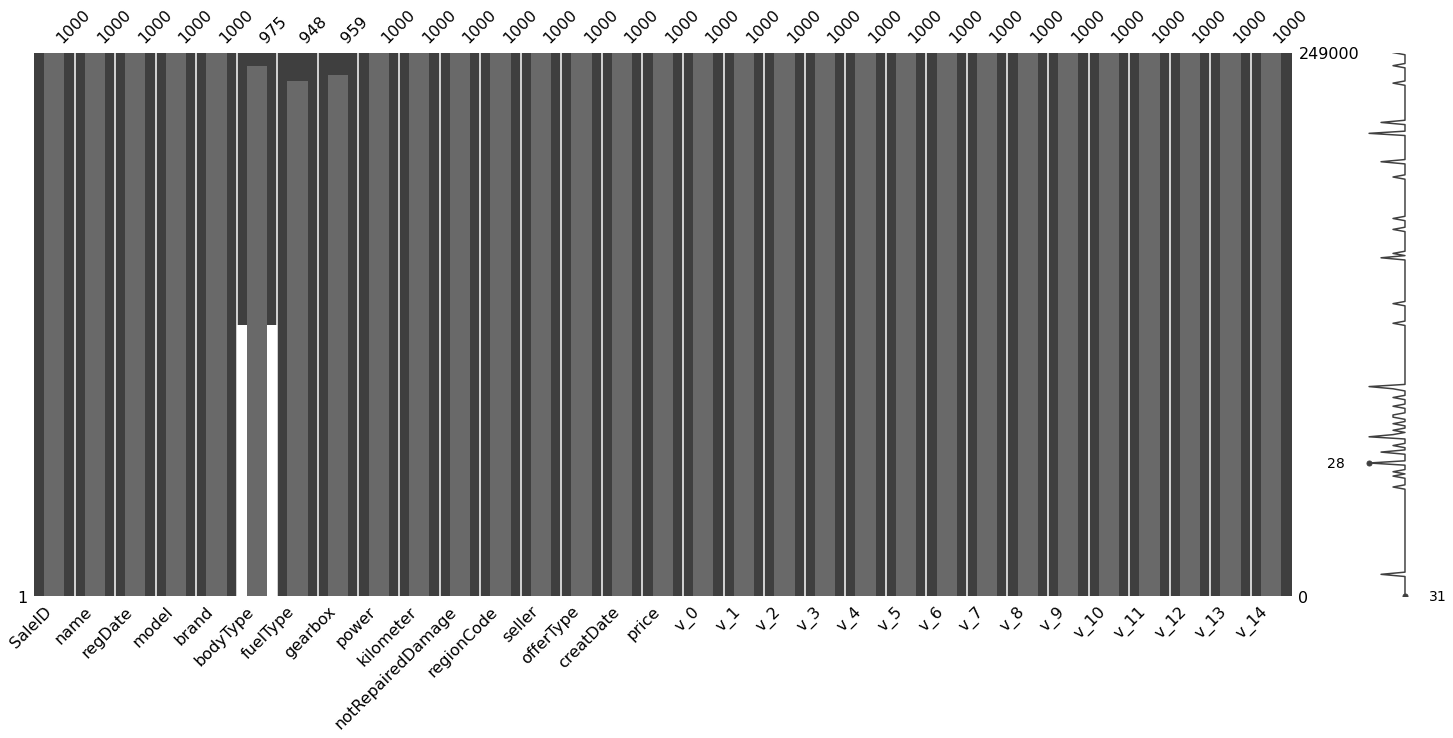

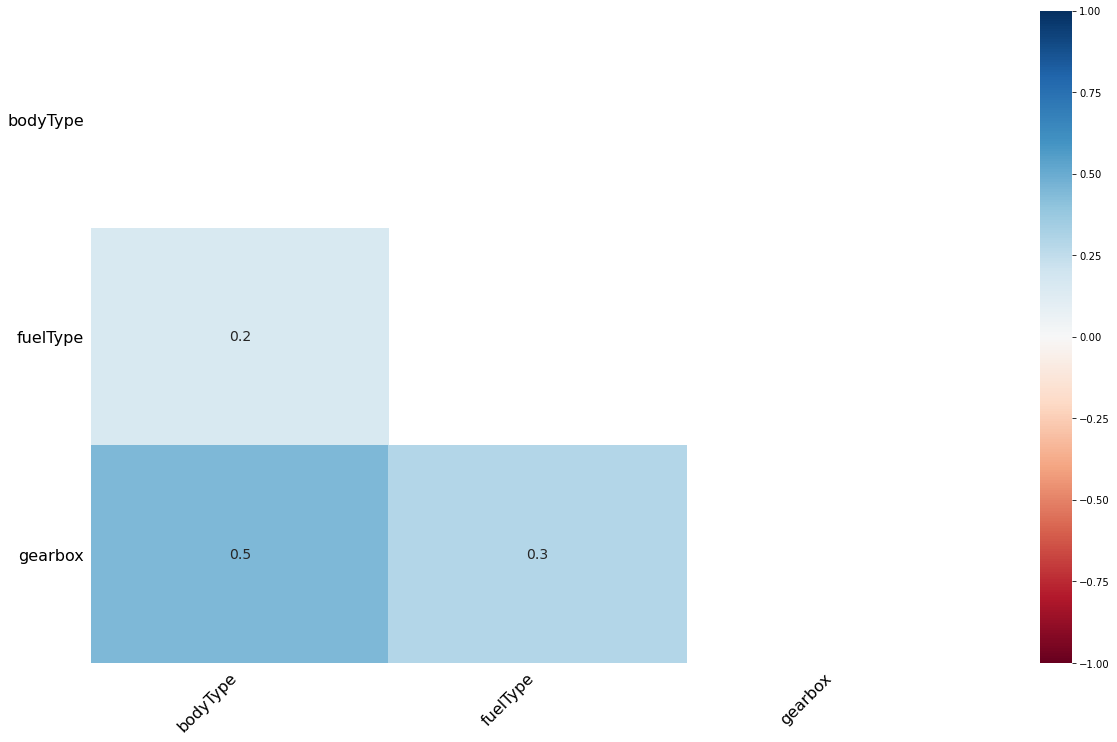

In [16]:
# 可视化看下缺省值
#msno库使用说明：https://blog.csdn.net/Andy_shenzl/article/details/81633356
import missingno as msno
msno.matrix(Train_data.sample(250))
msno.bar(Train_data.sample(1000))
msno.heatmap(Train_data.sample(250))
#missingno相关性热图措施无效的相关性：一个变量的存在或不存在如何强烈影响的另一个的存在：
    # 我们看到X5与X1.1的缺失相关性为1，说明X5只要发生了缺失，那么X1.1也会缺失，
    # X7和X8的相关性为-1，说明X7缺失的值，那么X8没有缺失；而X7没有缺失时，X8为缺失。

## 空缺率

In [ ]:
data_kql=(data.shape[0]-data.count())/data.count()
data_kql

# 进一步查看缺失特征中缺失率大于50%的特征

In [ ]:
have_null_fea_dict = (data_train.isnull().sum()/len(data_train)).to_dict()
fea_null_moreThanHalf = {}
for key,value in have_null_fea_dict.items():
    if value > 0.5:
        fea_null_moreThanHalf[key] = value

In [ ]:
fea_null_moreThanHalf

## 删除缺失值

In [ ]:
df.dropna()
'''
参数：
axis:       default 0指行,1为列
how:       {‘any’, ‘all’}, default ‘any’指带缺失值的所有行;'all’指清除全是缺失值的
thresh:    int,保留含有int个非空值的行
subset:   对特定的列进行缺失值删除处理
'''

## 填补缺失值

In [ ]:
df.fillna()

from sklearn.impute import SimpleImputer
df=SimpleImputer(*, missing_values=nan, strategy=‘mean’, fill_value=None, verbose=0, copy=True, add_indicator=False)

# 参数含义

# missing_values：int, float, str, (默认)np.nan或是None, 即缺失值是什么。

# strategy：空值填充的策略，共四种选择（默认）mean、median、most_frequent、constant。
#     mean表示该列的缺失值由该列的均值填充。
#     median为中位数，
#     most_frequent为众数。
#     constant表示将空值填充为自定义的值，但这个自定义的值要通过fill_value来定义。
    
# fill_value：str或数值，默认为Zone。
#     当strategy == "constant"时，fill_value被用来替换所有出现的缺失值（missing_values）。
#     fill_value为Zone，当处理的是数值数据时，缺失值（missing_values）会替换为0，对于字符串或对象数据类型则替换为"missing_value" 这一字符串。

# verbose：int，（默认）0，控制imputer的冗长。

# copy：boolean，（默认）True，表示对数据的副本进行处理，False对数据原地修改。

# add_indicator：boolean，（默认）False，True则会在数据后面加入n列由0和1构成的同样大小的数据，0表示所在位置非缺失值，1表示所在位置为缺失值。


## 根据规律填补（机器学习模型

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
df=pd.DataFrame({
    "one":np.random.randint(1,100,10),
    "two":[2,4,6,8,10,12,14,16,18,20],
    "three":[5,9,13,np.nan,21,np.nan,29,33,37,41]
})

df_train=df.dropna() #训练集
df_test=df[df['three'].isnull()]  #测试集,缺失值为需预测的值

regr=LinearRegression()
regr.fit(df_train['two'].values.reshape(-1,1),df_train['three'].values.reshape(-1,1))#训练出线性回归模型
df_three_pred=regr.predict(df_test['two'].values.reshape(-1,1))#用训练好的模型预测缺失值

#将所得数值填补到原数据集中
df.loc[(df.three.isnull()),'three']=df_three_pred
df
#df.loc[ 行索引, 列索引]


# z.reshape(-1)
# array([ 1,  2,  3,  4])
# z.reshape(-1,1)
#  array([[ 1],
#         [ 2],
#         [ 3],
#         [ 4]])
# 让z变成只有一列，行数不知道多少，通过`z.reshape(-1,1)`，Numpy自动计算

,one,two,three
0,62,2,5.0
1,54,4,9.0
2,8,6,13.0
3,32,8,17.0
4,6,10,21.0
5,56,12,25.0
6,45,14,29.0
7,98,16,33.0
8,12,18,37.0
9,91,20,41.0


In [2]:
df_test

,one,two,three
3,32,8,NaN
5,56,12,NaN


## 删除异常值

In [15]:
#以下两个类别特征严重倾斜，一般不会对预测有什么帮助，故这边先删掉，当然你也可以继续挖掘，但是一般意义不大
Train_data["seller"].value_counts()

0    149036
1         1
Name: seller, dtype: int64

In [13]:
# 这里我包装了一个异常值处理的代码，可以随便调用。
def outliers_proc(data, col_name, scale=3):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """

    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)

    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print("Now column number is: {}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n

Delete number is: 963
Now column number is: 149037
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: power, dtype: float64
Description of data larger than the upper bound is:
count      963.000000
mean       846.836968
std       1929.418081
min        376.000000
25%        400.000000
50%        436.000000
75%        514.000000
max      19312.000000
Name: power, dtype: float64


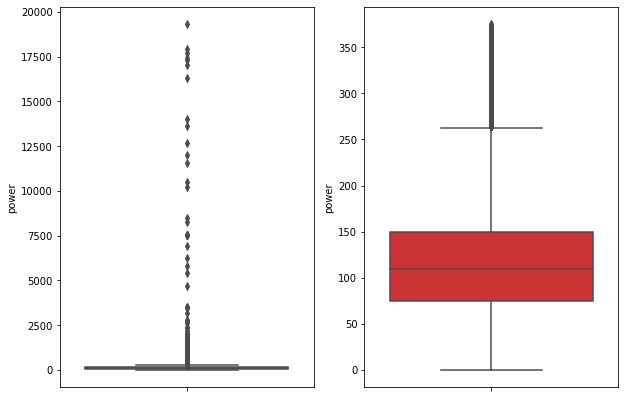

In [14]:
# 我们可以删掉一些异常数据，以 power 为例。  
# 这里删不删同学可以自行判断
# 但是要注意 test 的数据不能删 = = 不能掩耳盗铃是不是

Train_data = outliers_proc(Train_data, 'power', scale=3)

## OneHot编码

In [14]:
import pandas as pd
persons=pd.DataFrame({'name':['newton','andrew','jodn','bill'],'color':['yellow','white','black','white']})
print(persons)
df_dum=pd.get_dummies(persons['color'])
print(df_dum)
persons1=pd.concat([persons,df_dum],axis=1)
print(persons1)
#或者这一种简写
persons2 = pd.get_dummies(persons, columns=['color'])
print(persons2)

     name   color
0  newton  yellow
1  andrew   white
2    jodn   black
3    bill   white
   black  white  yellow
0      0      0       1
1      0      1       0
2      1      0       0
3      0      1       0
     name   color  black  white  yellow
0  newton  yellow      0      0       1
1  andrew   white      0      1       0
2    jodn   black      1      0       0
3    bill   white      0      1       0
     name  color_black  color_white  color_yellow
0  newton            0            0             1
1  andrew            0            1             0
2    jodn            1            0             0
3    bill            0            1             0


In [7]:
pd.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)[source]
# data ： array-like，Series或DataFrame

# prefix ：string，字符串列表或字符串dict，默认为None，

# 用于追加DataFrame列名的字符串。在DataFrame上调用get_dummies时，传递一个长度等于列数的列表。或者，前缀 可以是将列名称映射到前缀的字典。

# prefix_sep ： string，默认为’_’

# 如果附加前缀，分隔符/分隔符要使用。或者传递与前缀一样的列表或字典。

# dummy_na ： bool，默认为False
# 如果忽略False NaN，则添加一列以指示NaN。

# columns ： 类似列表，默认为无
# 要编码的DataFrame中的列名称。如果列是None，那么所有与列 对象或类别 D型细胞将被转换。

# sparse ： bool，默认为False
# 伪编码列是否应由SparseArray（True）或常规NumPy数组（False）支持。

# drop_first ： bool，默认为False
# 是否通过删除第一级别从k分类级别获得k-1个假人。

print(pd.get_dummies(persons))
print(pd.get_dummies(persons,prefix='haha',prefix_sep='*'))


   black  white  yellow  name_andrew  name_bill  name_jodn  name_newton  \
0      0      0       1            0          0          0            1   
1      0      1       0            1          0          0            0   
2      1      0       0            0          0          1            0   
3      0      1       0            0          1          0            0   

   color_black  color_white  color_yellow  
0            0            0             1  
1            0            1             0  
2            1            0             0  
3            0            1             0  
   black  white  yellow  haha*andrew  haha*bill  haha*jodn  haha*newton  \
0      0      0       1            0          0          0            1   
1      0      1       0            1          0          0            0   
2      1      0       0            0          0          1            0   
3      0      1       0            0          1          0            0   

   haha*black  haha*white  h

In [3]:
persons=pd.concat([persons,df_dum],axis=1)
persons

,name,color,black,white,yellow
0,newton,yellow,0,0,1
1,andrew,white,0,1,0
2,jodn,black,1,0,0
3,bill,white,0,1,0


## 数据离散化（分箱）

In [47]:
#无监督离散化
ages=pd.DataFrame({'years':[10,140,30,53,67,32,45],'name':['a1','a2','a3','a4','a5','a6','a7']})
print(ages)
ages['label']=pd.cut(ages['years'],3)
print(ages)
ages['label']=pd.cut(ages['years'],3,labels=['青年','中年','老年']) #等宽分箱
print(ages)
ages['label']=pd.cut(ages['years'],bins=[9,20,50,200],labels=['青年','中年','老年'])  #bins不等宽分箱
print(ages)

#-------------------------------------------------------------------------

from sklearn.preprocessing import KBinsDiscretizer
kbd=KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='uniform')
#n_bins：表示所划分的区间个数（整数）
#encode：表示离散化后的结果保存方式
#     onehot：离散化后OnheHot编码，返回一个稀疏矩阵
#     onehot-dense：离散化后OnheHot编码，返回一个数组
#     ordinal:离散化后,以整数数值标记相应的记录
# strategy:离散化策略
#     uniform:分区的宽度相同
#     quantile:默认值,分区样本数量相同
#     kmeans:k-means聚类算法设置分区

ages=pd.DataFrame({'years':[10,140,30,53,67,32,45],'name':['a1','a2','a3','a4','a5','a6','a7']})
trans=kbd.fit_transform(ages[['years']])
ages['kbd']=trans[:,0]
print(ages)

   years name
0     10   a1
1    140   a2
2     30   a3
3     53   a4
4     67   a5
5     32   a6
6     45   a7
   years name             label
0     10   a1    (9.87, 53.333]
1    140   a2   (96.667, 140.0]
2     30   a3    (9.87, 53.333]
3     53   a4    (9.87, 53.333]
4     67   a5  (53.333, 96.667]
5     32   a6    (9.87, 53.333]
6     45   a7    (9.87, 53.333]
   years name label
0     10   a1    青年
1    140   a2    老年
2     30   a3    青年
3     53   a4    青年
4     67   a5    中年
5     32   a6    青年
6     45   a7    青年
   years name label
0     10   a1    青年
1    140   a2    老年
2     30   a3    中年
3     53   a4    老年
4     67   a5    老年
5     32   a6    中年
6     45   a7    中年
   years name  kbd
0     10   a1  0.0
1    140   a2  2.0
2     30   a3  0.0
3     53   a4  0.0
4     67   a5  1.0
5     32   a6  0.0
6     45   a7  0.0


# 了解预测值分布

In [18]:
Train_data['price']

0         1850
1         3600
2         6222
3         2400
4         5200
          ... 
149995    5900
149996    9500
149997    7500
149998    4999
149999    4700
Name: price, Length: 150000, dtype: int64

In [19]:
Train_data['price'].value_counts()

500      2337
1500     2158
1200     1922
1000     1850
2500     1821
         ... 
1433        1
8911        1
12877       1
9885        1
8188        1
Name: price, Length: 3763, dtype: int64

<AxesSubplot:title={'center':'Log Normal'}, xlabel='price'>

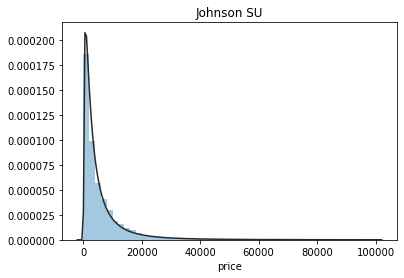

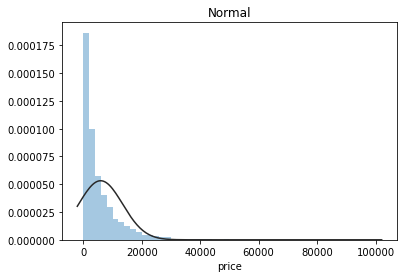

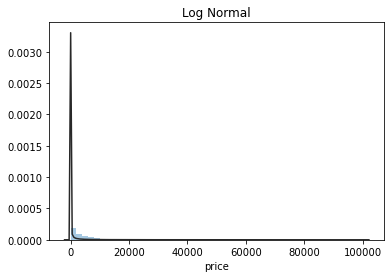

In [30]:
## 1) 总体分布概况（无界约翰逊分布等）
import scipy.stats as st
y = Train_data['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)
#价格不服从正态分布，所以在进行回归之前，它必须进行转换。虽然对数变换做得很好，但最佳拟合是无界约翰逊分布

In [ ]:
## 2) 查看skewness and kurtosis
sns.distplot(Train_data['price']);
print("Skewness: %f" % Train_data['price'].skew())
#数据的不对称程度 
#Skewness> 0,正偏差数值较大，为正偏或右偏。长尾巴拖在右边，数据右端有较多的极端值。
#Skewness < 0 ，负偏差数值较大，为负偏或左偏。长尾巴拖在左边，数据左端有较多的极端值。
#数值的绝对值越大，表明数据分布越不对称，偏斜程度大。
print("Kurtosis: %f" % Train_data['price'].kurt())
#数据分布顶的尖锐程度。
#（1）Kurtosis=0 与正态分布的陡缓程度相同。
#（2）Kurtosis>0 比正态分布的高峰更加陡峭——尖顶峰
#（3）Kurtosis<0 比正态分布的高峰来得平台——平顶峰

In [ ]:
Train_data.skew(), Train_data.kurt()

In [ ]:
sns.distplot(Train_data.skew(),color='blue',axlabel ='Skewness')

In [ ]:
sns.distplot(Train_data.kurt(),color='orange',axlabel ='Kurtness')
# skew、kurt说明参考https://www.cnblogs.com/wyy1480/p/10474046.html

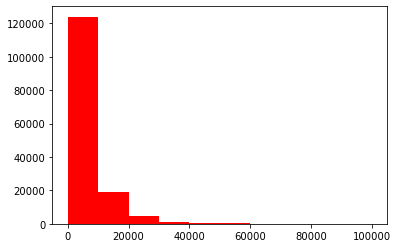

(array([   87.,   944.,  5599., 19868., 35074., 37246., 30925., 16298.,
         3535.,   424.]),
 array([-3.77759947, -3.07260977, -2.36762006, -1.66263036, -0.95764066,
        -0.25265095,  0.45233875,  1.15732845,  1.86231816,  2.56730786,
         3.27229756]),
 <BarContainer object of 10 artists>)

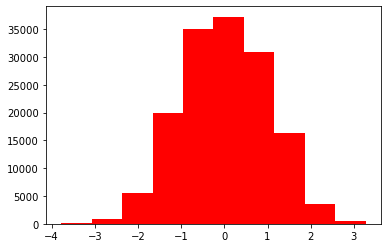

In [27]:
## 3) 查看预测值的具体频数
plt.hist(Train_data['price'], orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

#查看频数, 大于20000得值极少，其实这里也可以把这些当作特殊得值（异常值）直接用填充或者删掉，再前面进行
#orientation = 'vertical' 'horizontal',改变条形图方向
#查看预测值具体频数，右边有个较长的尾巴，用log变换来让图更符合正态

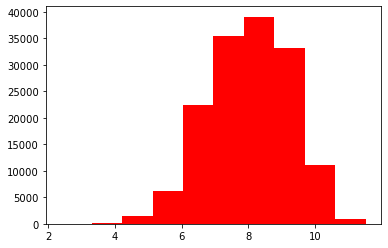

In [24]:
# log变换 z之后的分布较均匀，可以进行log变换进行预测，这也是预测问题常用的trick
plt.hist(np.log(Train_data['price']), orientation = 'vertical',histtype = 'bar', color ='red') 
plt.show()

(array([  100.,   978.,  6891., 22634., 35029., 37126., 29094., 14191.,
         2768.,   226.]),
 array([-3.72776727, -3.01862462, -2.30948197, -1.60033933, -0.89119668,
        -0.18205403,  0.52708862,  1.23623127,  1.94537392,  2.65451657,
         3.36365921]),
 <BarContainer object of 10 artists>)

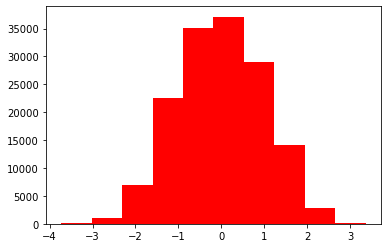

In [6]:
#Box-Cox变换
    #Box-Cox变换不支持负值的输入；
    # Box-Cox变换对于lognormal and chi-squared分布（对数正态、卡方），表现好于Yeo-Johnson变换；
from sklearn.preprocessing import power_transform
dft2=power_transform(Train_data[['price']],method='box-cox')
plt.hist(dft2, orientation = 'vertical',histtype = 'bar', color ='red')

(array([  100.,   980.,  5694., 23555., 31696., 37210., 30656., 16191.,
         3496.,   422.]),
 array([-3.74163812, -3.0404966 , -2.33935509, -1.63821358, -0.93707206,
        -0.23593055,  0.46521097,  1.16635248,  1.86749399,  2.56863551,
         3.26977702]),
 <BarContainer object of 10 artists>)

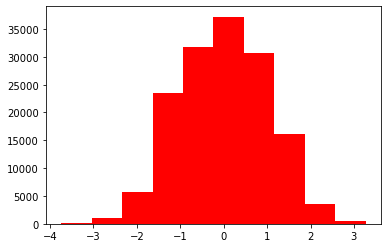

In [29]:
#yeo-johnson变换
#Yeo-Johnson变换的特点在于其可被应用于包含0值和负值的样本中，因此其也被认为是Box-Cox变换在实数域的推广
from sklearn.preprocessing import power_transform
dft2=power_transform(Train_data[['price']],method='yeo-johnson')
plt.hist(dft2, orientation = 'vertical',histtype = 'bar', color ='red')

# 特征分为类别特征和数字特征，并对类别特征查看unique分布

In [52]:
# 分离label即预测值
Y_train = Train_data['price']

In [48]:
# 这个区别方式适用于没有直接label coding的数据
# 这里不适用，需要人为根据实际含义来区分
# 数字特征
# numeric_features = Train_data.select_dtypes(include=[np.number])
# numeric_features.columns
# 类型特征
categorical_features = Train_data.select_dtypes(include=[np.object])
categorical_features.columns



# numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns)
# category_fea = list(filter(lambda x: x not in numerical_fea,list(data_train.columns)))

In [53]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]

categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode',]

## 特征nunique分布

In [54]:
# 特征nunique分布
#unique() 返回列的所有唯一值（特征的所有唯一值）
# nunique() 即返回的是唯一值的个数

for cat_fea in categorical_features:
    print(cat_fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea, Train_data[cat_fea].nunique()))
    print(Train_data[cat_fea].value_counts())

name的特征分布如下：
name特征有个99662不同的值
387       282
708       282
55        280
1541      263
203       233
         ... 
26403       1
28450       1
32544       1
102174      1
184730      1
Name: name, Length: 99662, dtype: int64
model的特征分布如下：
model特征有个248不同的值
0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
242.0        2
209.0        2
245.0        2
240.0        2
247.0        1
Name: model, Length: 248, dtype: int64
brand的特征分布如下：
brand特征有个40不同的值
0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      649
32      592
29      406
37      333
2       321
31      318
18      316
36      228
34      227
33      218
23      186
35      180
38       65
39        9
Name: brand, dtype: int64
body

# 数字特征分析

In [55]:
numeric_features.append('price')

In [56]:
numeric_features

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'price']

# 划分数值型变量中的连续变量和离散型变量

In [ ]:
#过滤数值型类别特征
def get_numerical_serial_fea(data,feas):
    numerical_serial_fea = []
    numerical_noserial_fea = []
    for fea in feas:
        temp = data[fea].nunique()
        if temp <= 10:
            numerical_noserial_fea.append(fea)
            continue
        numerical_serial_fea.append(fea)
    return numerical_serial_fea,numerical_noserial_fea
numerical_serial_fea,numerical_noserial_fea = get_numerical_serial_fea(data_train,numerical_fea)

In [ ]:
numerical_serial_fea

In [ ]:
numerical_noserial_fea

In [57]:
## 1) 相关性分析
price_numeric = Train_data[numeric_features]
correlation = price_numeric.corr()
print(correlation['price'].sort_values(ascending = False),'\n')
#数字特征分析是去做一个相关性的分析。主要是包括v开头的那些匿名特征，power，kilometer。需注意的是，相关性分析只对存在线性关系的变量有意义。

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64 



<AxesSubplot:title={'center':'Correlation of Numeric Features with Price'}>

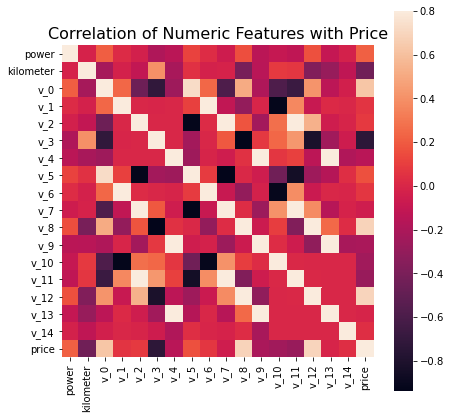

In [58]:
f , ax = plt.subplots(figsize = (7, 7))
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.set(font="simhei")
sns.heatmap(correlation,square = True,  vmax=0.8)

In [59]:
del price_numeric['price']

In [60]:
## 2) 查看几个特征得 偏度和峰值
for col in numeric_features:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(Train_data[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(Train_data[col].kurt())  
         )

power           Skewness: 65.86     Kurtosis: 5733.45
kilometer       Skewness: -1.53     Kurtosis: 001.14
v_0             Skewness: -1.32     Kurtosis: 003.99
v_1             Skewness: 00.36     Kurtosis: -01.75
v_2             Skewness: 04.84     Kurtosis: 023.86
v_3             Skewness: 00.11     Kurtosis: -00.42
v_4             Skewness: 00.37     Kurtosis: -00.20
v_5             Skewness: -4.74     Kurtosis: 022.93
v_6             Skewness: 00.37     Kurtosis: -01.74
v_7             Skewness: 05.13     Kurtosis: 025.85
v_8             Skewness: 00.20     Kurtosis: -00.64
v_9             Skewness: 00.42     Kurtosis: -00.32
v_10            Skewness: 00.03     Kurtosis: -00.58
v_11            Skewness: 03.03     Kurtosis: 012.57
v_12            Skewness: 00.37     Kurtosis: 000.27
v_13            Skewness: 00.27     Kurtosis: -00.44
v_14            Skewness: -1.19     Kurtosis: 002.39
price           Skewness: 03.35     Kurtosis: 019.00


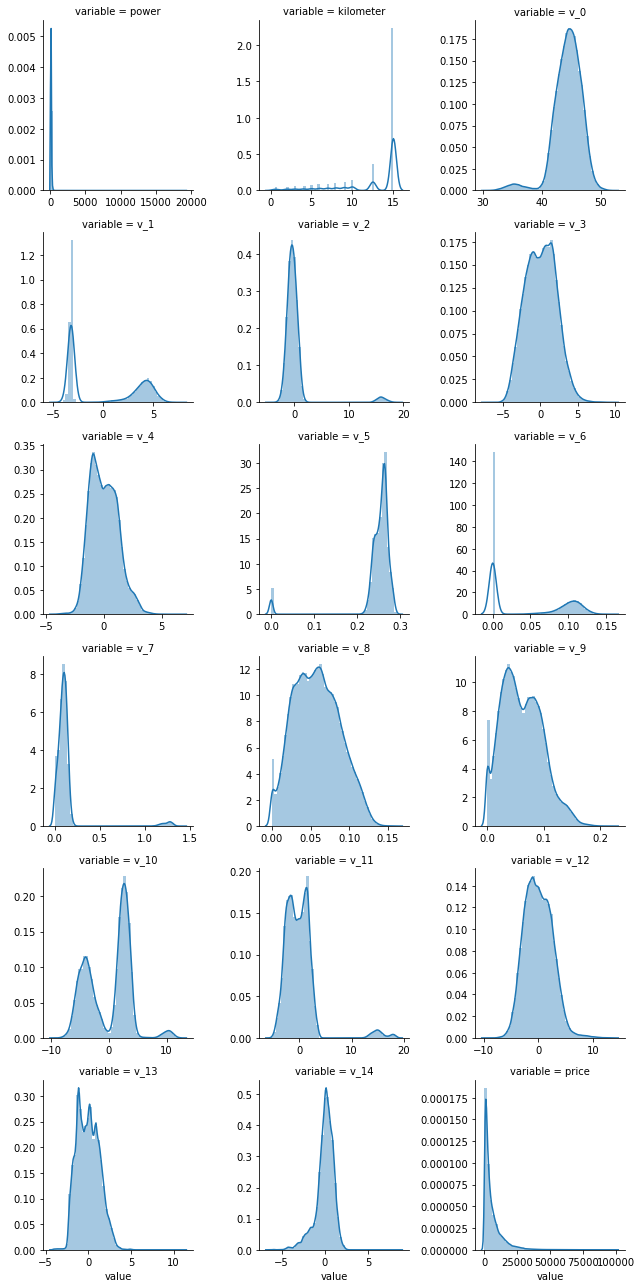

In [61]:
## 3) 每个数字特征得分布可视化
f = pd.melt(Train_data, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

## 可以看出匿名特征相对分布均匀

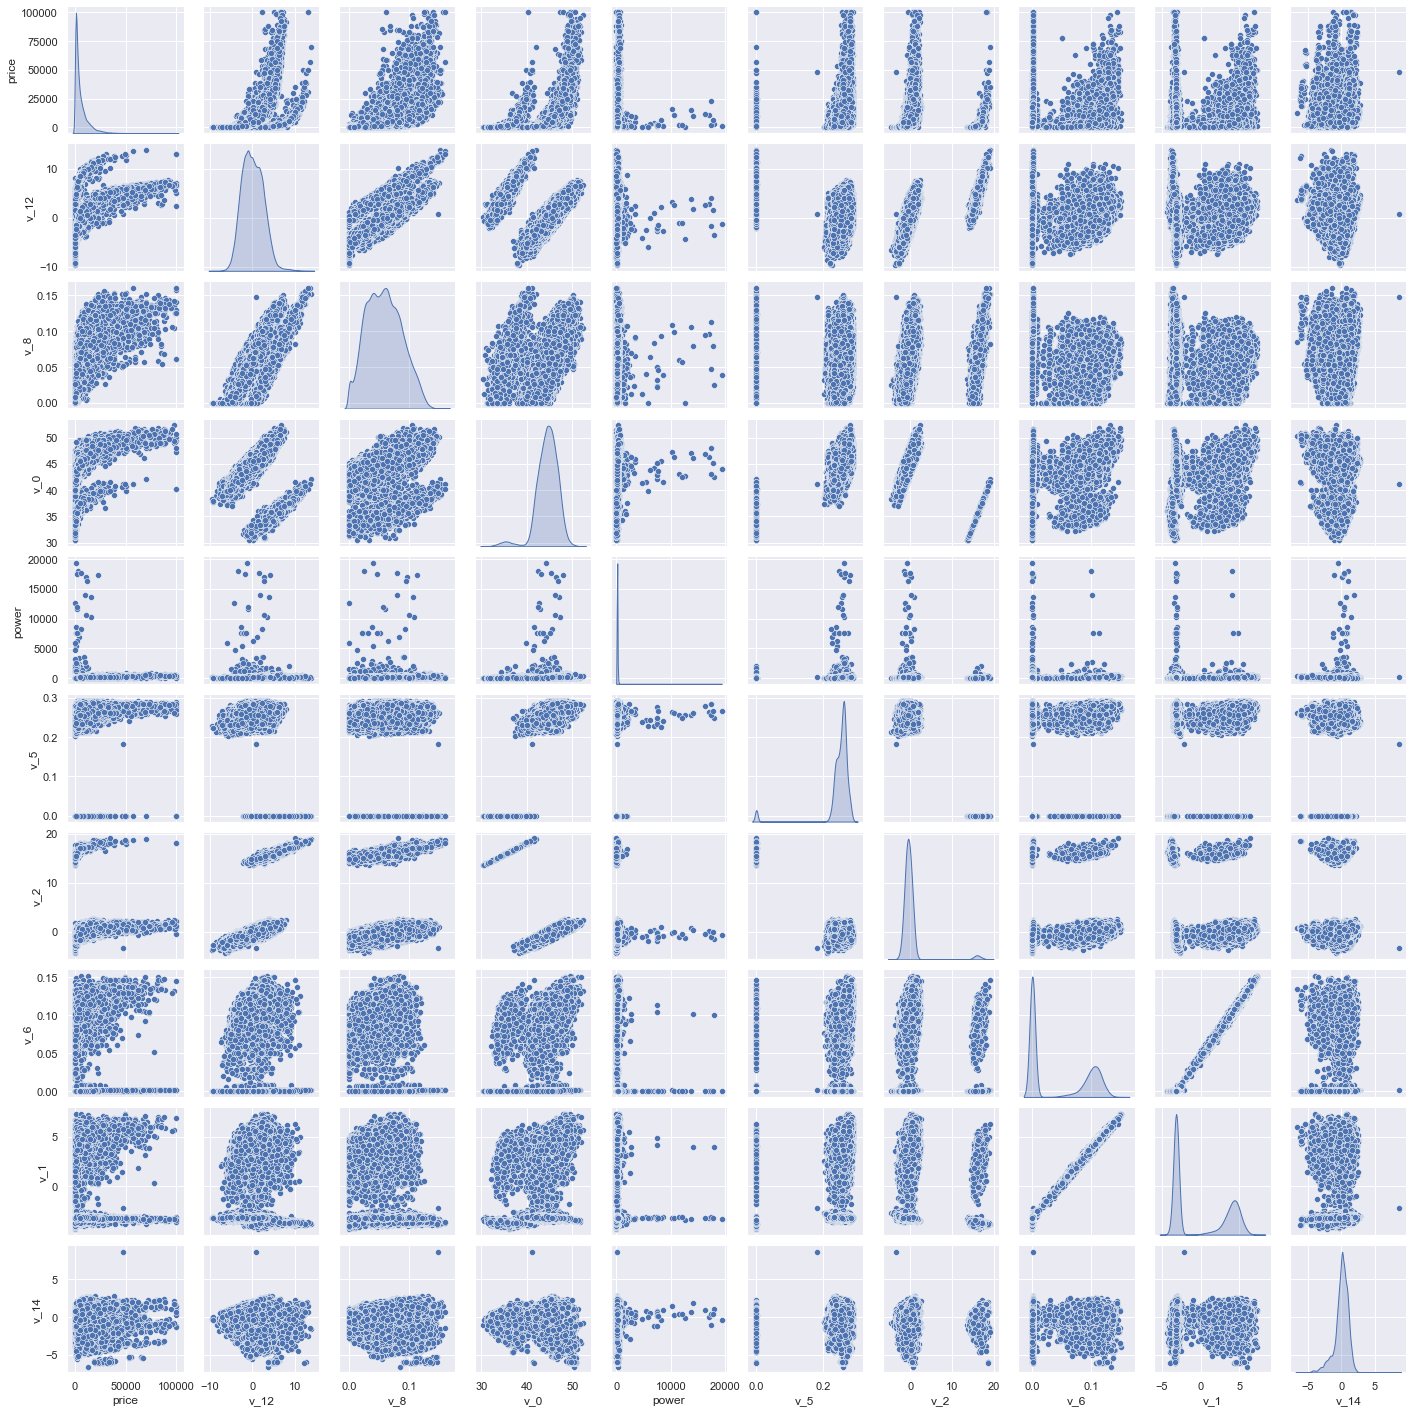

In [62]:
## 4) 数字特征相互之间的关系可视化
sns.set()
columns = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(Train_data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

<AxesSubplot:xlabel='v_13', ylabel='price'>

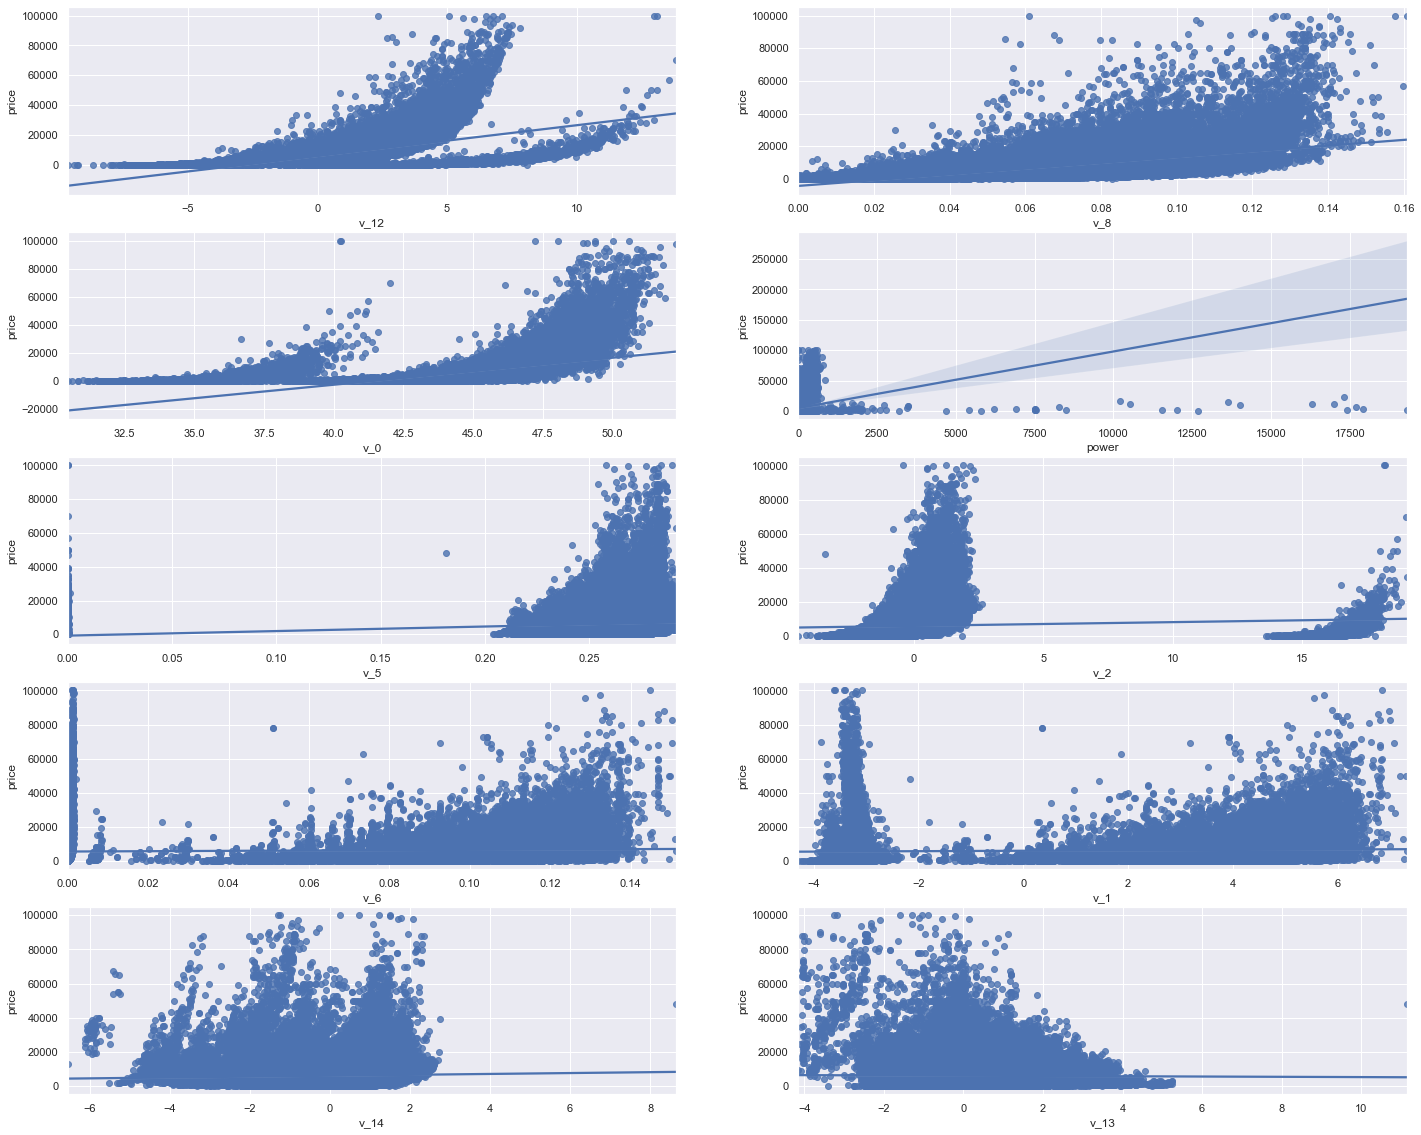

In [63]:
## 5) 多变量互相回归关系可视化
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(24, 20))
# ['v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
# Y_train:分离label即预测值
v_12_scatter_plot = pd.concat([Y_train,Train_data['v_12']],axis = 1)
sns.regplot(x='v_12',y = 'price', data = v_12_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

v_8_scatter_plot = pd.concat([Y_train,Train_data['v_8']],axis = 1)
sns.regplot(x='v_8',y = 'price',data = v_8_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

v_0_scatter_plot = pd.concat([Y_train,Train_data['v_0']],axis = 1)
sns.regplot(x='v_0',y = 'price',data = v_0_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

power_scatter_plot = pd.concat([Y_train,Train_data['power']],axis = 1)
sns.regplot(x='power',y = 'price',data = power_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

v_5_scatter_plot = pd.concat([Y_train,Train_data['v_5']],axis = 1)
sns.regplot(x='v_5',y = 'price',data = v_5_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

v_2_scatter_plot = pd.concat([Y_train,Train_data['v_2']],axis = 1)
sns.regplot(x='v_2',y = 'price',data = v_2_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

v_6_scatter_plot = pd.concat([Y_train,Train_data['v_6']],axis = 1)
sns.regplot(x='v_6',y = 'price',data = v_6_scatter_plot,scatter= True, fit_reg=True, ax=ax7)

v_1_scatter_plot = pd.concat([Y_train,Train_data['v_1']],axis = 1)
sns.regplot(x='v_1',y = 'price',data = v_1_scatter_plot,scatter= True, fit_reg=True, ax=ax8)

v_14_scatter_plot = pd.concat([Y_train,Train_data['v_14']],axis = 1)
sns.regplot(x='v_14',y = 'price',data = v_14_scatter_plot,scatter= True, fit_reg=True, ax=ax9)

v_13_scatter_plot = pd.concat([Y_train,Train_data['v_13']],axis = 1)
sns.regplot(x='v_13',y = 'price',data = v_13_scatter_plot,scatter= True, fit_reg=True, ax=ax10)


# 类别特征分析

In [67]:
## 1) unique分布
for fea in categorical_features:
    print(Train_data[fea].nunique())
    
# 对于一维数组或者列表，unique函数去除其中重复的元素，并按元素由大到小返回一个新的无元素重复的元组或者列表。

99662
248
40
8
7
2
3
7905


In [68]:
categorical_features

['name',
 'model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage',
 'regionCode']

In [ ]:
## 2) 类别特征箱形图可视化

# 因为 name和 regionCode的类别太稀疏了，这里我们把不稀疏的几类画一下
categorical_features = ['model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage']
for c in categorical_features:
    Train_data[c] = Train_data[c].astype('category')
    if Train_data[c].isnull().any():
        Train_data[c] = Train_data[c].cat.add_categories(['MISSING'])
        Train_data[c] = Train_data[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "price")

In [ ]:
Train_data.columns

In [ ]:
## 3) 类别特征的小提琴图可视化
catg_list = categorical_features
target = 'price'
for catg in catg_list :
    sns.violinplot(x=catg, y=target, data=Train_data)
    plt.show()

In [ ]:
categorical_features = ['model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage']

In [ ]:
## 4) 类别特征的柱形图可视化
def bar_plot(x, y, **kwargs):
    sns.barplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(bar_plot, "value", "price")

In [ ]:
##  5) 类别特征的每个类别频数可视化(count_plot)
def count_plot(x,  **kwargs):
    sns.countplot(x=x)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data,  value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(count_plot, "value")

# 用pandas_profiling生成数据报告

In [ ]:
#用pandas_profiling生成一个较为全面的可视化和数据报告(较为简单、方便) 最终打开html文件即可
import pandas_profiling

In [ ]:
pfr = pandas_profiling.ProfileReport(Train_data)
pfr.to_file("./example.html")

In [ ]:
# 所给出的EDA步骤为广为普遍的步骤，在实际的不管是工程还是比赛过程中，这只是最开始的一步，也是最基本的一步。
# 接下来一般要结合模型的效果以及特征工程等来分析数据的实际建模情况，根据自己的一些理解，查阅文献，对实际问题做出判断和深入的理解。
# 最后不断进行EDA与数据处理和挖掘，来到达更好的数据结构和分布以及较为强势相关的特征
# 数据探索在机器学习中我们一般称为EDA（Exploratory Data Analysis）：
# 是指对已有的数据（特别是调查或观察得来的原始数据）在尽量少的先验假定下进行探索，通过作图、制表、方程拟合、计算特征量等手段探索数据的结构和规律的一种数据分析方法。
# 数据探索有利于我们发现数据的一些特性，数据之间的关联性，对于后续的特征构建是很有帮助的。
# 对于数据的初步分析（直接查看数据，或.sum(), .mean()，.descirbe()等统计函数）可以从：样本数量，训练集数量，是否有时间特征，是否是时许问题，特征所表示的含义（非匿名特征），特征类型（字符类似，int，float，time），特征的缺失情况（注意缺失的在数据中的表现形式，有些是空的有些是”NAN”符号等），特征的均值方差情况。
# 分析记录某些特征值缺失占比30%以上样本的缺失处理，有助于后续的模型验证和调节，分析特征应该是填充（填充方式是什么，均值填充，0填充，众数填充等），还是舍去，还是先做样本分类用不同的特征模型去预测。
# 对于异常值做专门的分析，分析特征异常的label是否为异常值（或者偏离均值较远或者事特殊符号）,异常值是否应该剔除，还是用正常值填充，是记录异常，还是机器本身异常等。
# 对于Label做专门的分析，分析标签的分布情况等。
# 进步分析可以通过对特征作图，特征和label联合做图（统计图，离散图），直观了解特征的分布情况，通过这一步也可以发现数据之中的一些异常值等，通过箱型图分析一些特征值的偏离情况，对于特征和特征联合作图，对于特征和label联合作图，分析其中的一些关联性。

In [ ]:
#循环特征选择
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

data=pd.read_csv('.csv')
x=data.iloc[:,0:14] #前十四个字段做自变量
y=data.iloc[:,-1].values #最后一个做应变量
knn=KNeighborsClassifier(n_neighbors=4)
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1=SFS(knn,k_features=4,forward=True,floating=False,verbose=2,scoring='accuracy',cv=0)
sfs1=sfs1.fit(x,y)
sfs1.subset_

